In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import seaborn as sns
import math

In [3]:
nse = yf.Ticker("^NSEI")

In [4]:
nse_historical = nse.history(start="2000-10-01", end="2022-10-01", interval="1d")
nse_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0,0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0,0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0,0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0,0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0,0
...,...,...,...,...,...,...,...
2022-09-26 00:00:00+05:30,17156.300781,17196.400391,16978.300781,17016.300781,492000,0,0
2022-09-27 00:00:00+05:30,17110.900391,17176.449219,16942.349609,17007.400391,359900,0,0
2022-09-28 00:00:00+05:30,16870.550781,17037.599609,16820.400391,16858.599609,323900,0,0


In [5]:
df=nse_historical.iloc[:,3]

In [6]:
df.head()

Date
2007-09-17 00:00:00+05:30    4494.649902
2007-09-18 00:00:00+05:30    4546.200195
2007-09-19 00:00:00+05:30    4732.350098
2007-09-20 00:00:00+05:30    4747.549805
2007-09-21 00:00:00+05:30    4837.549805
Name: Close, dtype: float64

In [7]:
df.shape

(3685,)

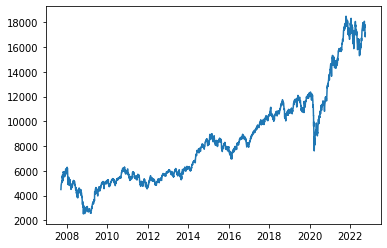

In [8]:
plt.plot(df)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [11]:
df1.shape

(3685, 1)

In [12]:
train = int(len(df1)*0.63)
test = len(df1)-train

In [13]:
train_data = df1[0:train,:]
test_data = df1[train:len(df1),:]

In [14]:
print(train_data.shape)
print(test_data.shape)

(2321, 1)
(1364, 1)


In [15]:
def inputoutput(data,steps):
  x = []
  y = []
  for i in range(0,len(data)-steps-1):
    a=data[i:(i+steps),0]
    x.append(a)
    y.append(data[i+steps,0])
  return np.array(x) , np.array(y)

In [16]:
steps = 45
x_train , y_train=inputoutput(train_data,steps)
x_test , y_test=inputoutput(test_data,steps)

In [17]:
print(x_train.shape)
print(y_train.shape)

(2275, 45)
(2275,)


In [18]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
print(x_train.shape)

(2275, 45, 1)


In [19]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_test.shape)

(1318, 45, 1)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM

RNN Model

In [21]:
model = Sequential()
model.add(SimpleRNN(32,return_sequences=True, input_shape=(45,1)))
model.add(SimpleRNN(64,return_sequences=True))
model.add(SimpleRNN(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 45, 32)            1088      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 45, 64)            6208      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50)                5750      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 13,097
Trainable params: 13,097
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=55,batch_size=64)

Epoch 1/55
36/36 [==============================] - 5s 58ms/step - loss: 0.0517 - mean_absolute_error: 0.1519 - val_loss: 0.1532 - val_mean_absolute_error: 0.3553
Epoch 2/55
36/36 [==============================] - 2s 42ms/step - loss: 0.0014 - mean_absolute_error: 0.0270 - val_loss: 0.0535 - val_mean_absolute_error: 0.1824
Epoch 3/55
36/36 [==============================] - 2s 42ms/step - loss: 4.1949e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0526 - val_mean_absolute_error: 0.1822
Epoch 4/55
36/36 [==============================] - 2s 43ms/step - loss: 3.1962e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0456 - val_mean_absolute_error: 0.1653
Epoch 5/55
36/36 [==============================] - 1s 41ms/step - loss: 2.7643e-04 - mean_absolute_error: 0.0131 - val_loss: 0.0429 - val_mean_absolute_error: 0.1596
Epoch 6/55
36/36 [==============================] - 2s 43ms/step - loss: 2.4391e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0425 - val_mean_absolute_error: 0.1610
Epoch 

In [24]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

42/42 [==============================] - 0s 10ms/step


In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

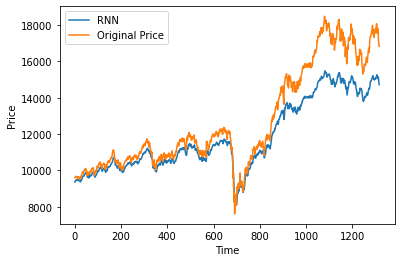

In [64]:
plt.plot(test_predict)
plt.plot(y_test)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['RNN','Original Price'])

LSTM model

In [31]:
model1 = Sequential()
model1.add(LSTM(32,return_sequences=True, input_shape=(45,1)))
model1.add(LSTM(64,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])

In [32]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 45, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 45, 64)            24832     
                                                                 
 lstm_2 (LSTM)               (None, 50)                23000     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 52,235
Trainable params: 52,235
Non-trainable params: 0
_________________________________________________________________


In [33]:
model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=55,batch_size=64)

Epoch 1/55
36/36 [==============================] - 12s 162ms/step - loss: 0.0088 - mean_absolute_error: 0.0645 - val_loss: 0.0183 - val_mean_absolute_error: 0.1251
Epoch 2/55
36/36 [==============================] - 4s 108ms/step - loss: 3.4444e-04 - mean_absolute_error: 0.0144 - val_loss: 9.0925e-04 - val_mean_absolute_error: 0.0204
Epoch 3/55
36/36 [==============================] - 4s 107ms/step - loss: 1.9077e-04 - mean_absolute_error: 0.0108 - val_loss: 9.3980e-04 - val_mean_absolute_error: 0.0207
Epoch 4/55
36/36 [==============================] - 4s 109ms/step - loss: 1.8206e-04 - mean_absolute_error: 0.0106 - val_loss: 9.5112e-04 - val_mean_absolute_error: 0.0210
Epoch 5/55
36/36 [==============================] - 4s 108ms/step - loss: 1.8399e-04 - mean_absolute_error: 0.0106 - val_loss: 9.0626e-04 - val_mean_absolute_error: 0.0209
Epoch 6/55
36/36 [==============================] - 4s 108ms/step - loss: 1.8100e-04 - mean_absolute_error: 0.0105 - val_loss: 6.9929e-04 - val_mea

In [34]:
train_predict1 = model1.predict(x_train)
test_predict1 = model1.predict(x_test)

42/42 [==============================] - 1s 21ms/step


In [35]:
train_predict1 = scaler.inverse_transform(train_predict1)
test_predict1 = scaler.inverse_transform(test_predict1)

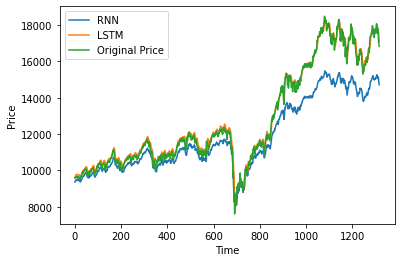

In [62]:
plt.plot(test_predict)
plt.plot(test_predict1)
plt.plot(y_test)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['RNN','LSTM','Original Price'])